In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'


In [3]:
df = pd.read_csv(url, sep=";")

df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In [4]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])

In [5]:
df = df[['TurId','Dato','Linjenavn','Passasjerer_Ombord']]
df

,TurId,Dato,Linjenavn,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,10
...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,100,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,100,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,20,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,100,5


In [6]:
df = df.loc[df['Linjenavn'] == "100"]
df

,TurId,Dato,Linjenavn,Passasjerer_Ombord
38,10008-2020-08-09T11:24:00+02:00,09/08/2020,100,1
42,10004-2020-08-18T04:59:00+02:00,18/08/2020,100,0
43,10009-2020-07-21T01:00:00+02:00,20/07/2020,100,7
46,10004-2020-07-04T18:24:00+02:00,04/07/2020,100,13
51,10002-2020-07-22T08:30:00+02:00,22/07/2020,100,0
...,...,...,...,...
5990,10001-2020-08-22T20:29:00+02:00,22/08/2020,100,6
5993,10013-2020-08-30T13:14:00+02:00,30/08/2020,100,5
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,100,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,100,2


In [7]:
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')
df['DatoOrdinal']=df['Dato'].map(dt.datetime.toordinal)
df = df.groupby(["Dato"]).sum("Passasjerer_Ombord").reset_index()
df['ID'] = df.index +1
df = df[['ID','Passasjerer_Ombord']]
df

,ID,Passasjerer_Ombord
0,1,17
1,2,38
2,3,50
3,4,66
4,5,10
...,...,...
85,86,77
86,87,42
87,88,40
88,89,17


<AxesSubplot:xlabel='ID', ylabel='Passasjerer_Ombord'>

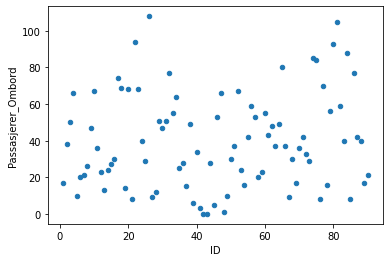

In [8]:
df.plot.scatter(x= 'ID', y = 'Passasjerer_Ombord')

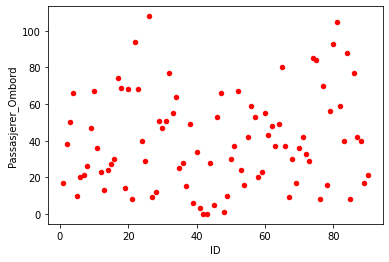

In [9]:
ax1 = df.plot(kind='scatter', x='ID', y='Passasjerer_Ombord', color='r')

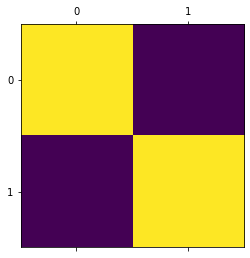

In [10]:
plt.matshow(df.corr())
plt.show()

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Passasjerer_Ombord
ID,1.000000,0.122561
Passasjerer_Ombord,0.122561,1.000000


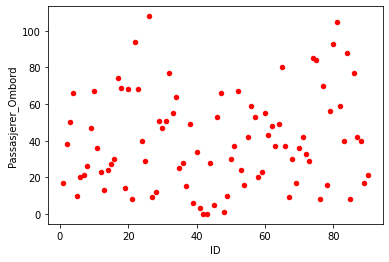

In [12]:
ax1 = df.plot(kind='scatter', x='ID', y='Passasjerer_Ombord', color='r')    


In [13]:
X = pd.DataFrame(df['ID']) #Var1
y = pd.DataFrame(df['Passasjerer_Ombord']) #Result

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)

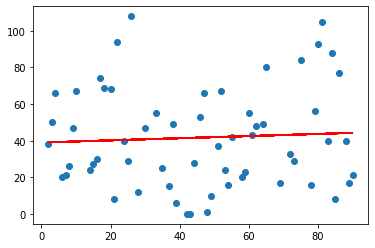

MSE = 737.9340099326397


In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

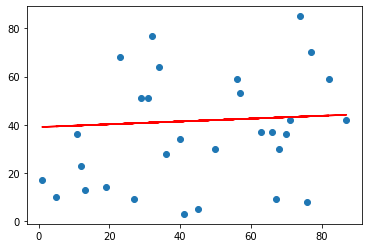

MSE = 526.4103537826825


In [17]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [18]:
prediction = '13/09/2020'
prediction = pd.to_datetime(prediction, format='%d/%m/%Y')
prediction = prediction.toordinal()
linear_regressor.predict([[prediction]])

/Users/hannanilsen/miniconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[43237.29719529]])

In [19]:
df2 = pd.read_csv(url, sep=";")
df2.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [20]:
df2['Dato'] = pd.to_datetime(df2['Dato'])

df2['Ukedag'] = df2['Dato'].dt.day_name()

conditions = [
    (df2['Ukedag'] == "Monday"),
    (df2['Ukedag'] == "Tuesday"),
    (df2['Ukedag'] == "Wednesday"),
    (df2['Ukedag'] == "Thursday"),
    (df2['Ukedag'] == "Friday"),
    (df2['Ukedag'] == "Saturday"),
    (df2['Ukedag'] == "Sunday"),
    ]

ukedagArray = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag']

df2['Ukedag'] = np.select(conditions, ukedagArray)
df2.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,Torsdag
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,Lørdag
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,Søndag
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,Mandag
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,Torsdag


In [26]:
df2 = df2.loc[df2['Linjenavn'] == "100"];

In [27]:
mandag=  df2[df2['Ukedag'].str.contains("Mandag")].Passasjerer_Ombord.sum()
tirsdag= df2[df2['Ukedag'].str.contains("Tirsdag")].Passasjerer_Ombord.sum()
onsdag= df2[df2['Ukedag'].str.contains("Onsdag")].Passasjerer_Ombord.sum()
torsdag= df2[df2['Ukedag'].str.contains("Torsdag")].Passasjerer_Ombord.sum()
fredag= df2[df2['Ukedag'].str.contains("Fredag")].Passasjerer_Ombord.sum()
lørdag= df2[df2['Ukedag'].str.contains("Lørdag")].Passasjerer_Ombord.sum()
søndag = df2[df2['Ukedag'].str.contains("Søndag")].Passasjerer_Ombord.sum()
Antall_PassasjererIUke = {'Ukedag': ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag", 'Lørdag','Søndag'],
        'Passasjerer_Per_Ukedag': [mandag, tirsdag, onsdag, torsdag, fredag, lørdag, søndag]
       }

df3 = pd.DataFrame(Antall_PassasjererIUke , columns = ['Ukedag', 'Passasjerer_Per_Ukedag'])
df3['UkedagID'] = [0, 1, 2, 3, 4, 5,6]
df3 = df3[['UkedagID','Passasjerer_Per_Ukedag']]
df3

,UkedagID,Passasjerer_Per_Ukedag
0,1,567
1,2,477
2,3,420
3,4,473
4,5,728
5,6,493
6,7,284


In [28]:
X = df3.iloc[:, 0:1].values
y = df3.iloc[:, 1].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


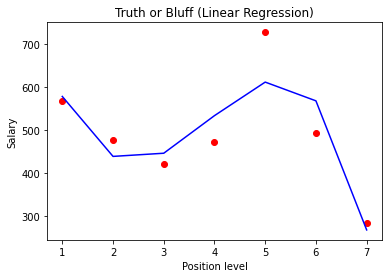

In [30]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [31]:
prediction2 = "Mandag"

pol_reg.predict(poly_reg.fit_transform([[1]]))

array([578.18181818])